In [178]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [179]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [180]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [181]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [182]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [183]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [184]:
# Save references to each table
stations=Base.classes.station
measurements=Base.classes.measurement

In [185]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [205]:
# Find the most recent date in the data set.
latest_date=session.query(measurements.date).order_by(measurements.date.desc()).first()
latest_date

('2017-08-23',)

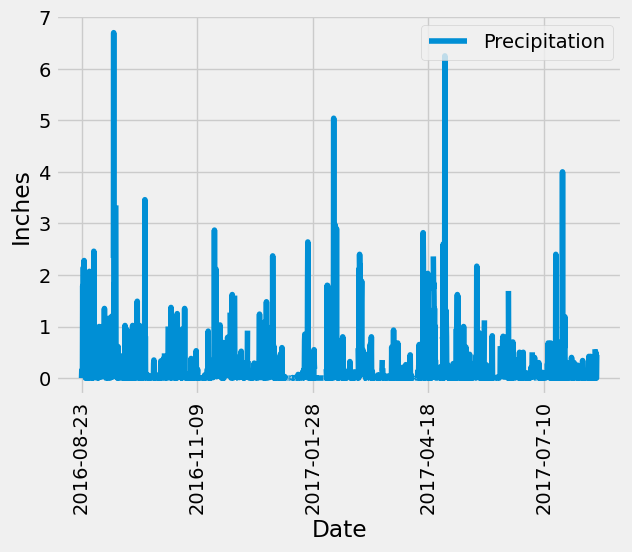

In [201]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date_str = latest_date[0] 

# Calculate the date one year from the last date in data set.
latest_date_obj = dt.datetime.strptime(latest_date_str, '%Y-%m-%d').date()
one_year_prior = latest_date_obj - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
recent_precip=session.query(measurements.date,measurements.prcp).\
    filter(func.strftime(measurements.date>=one_year_prior)).\
    order_by(measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df=pd.DataFrame(recent_precip,columns=["Date","Precipitation"])

# Sort the dataframe by date
precip_df=precip_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x="Date",y="Precipitation")
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()




In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [131]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(stations.station)).all()

[(9,)]

In [132]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel=[measurements.station,
     func.count(measurements.station)]
session.query(*sel).\
    group_by(measurements.station).\
    order_by(func.count(measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [133]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[func.min(measurements.tobs),
     func.max(measurements.tobs),
     func.avg(measurements.tobs)]
session.query(*sel).\
    filter(measurements.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

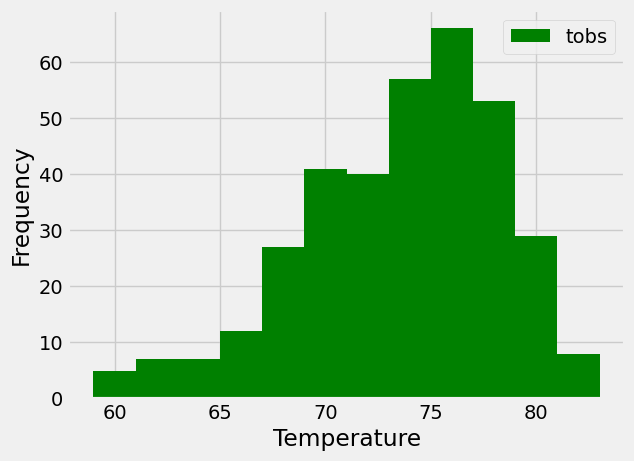

In [203]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year=session.query(measurements.tobs).\
    filter((measurements.station=='USC00519281')).\
    filter(func.strftime(measurements.date>=one_year_prior)).all()
last_year_df=pd.DataFrame(last_year)
last_year
plt.hist(last_year_df,bins=12,color='green',label='tobs')
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

# Close Session

In [206]:
# Close Session
session.close()